# Análise dos datasets


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load CSVs


In [2]:
df_hippo = pd.read_csv('../datasets_originais/train_radiomics_hipocamp.csv')
df_test = pd.read_csv('../datasets_originais/test_radiomics_hipocamp.csv')

Age

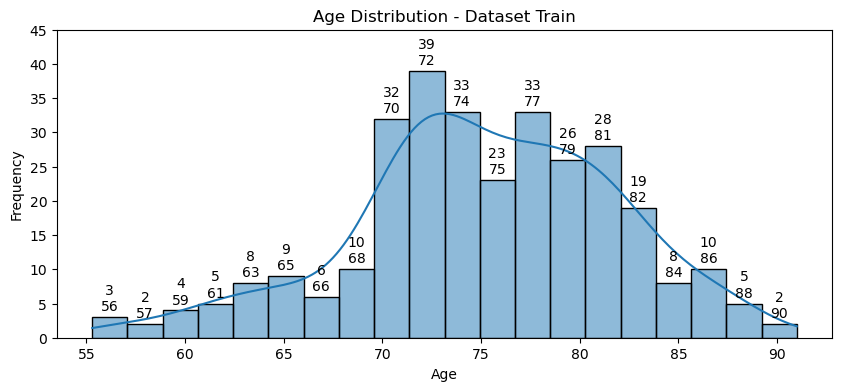

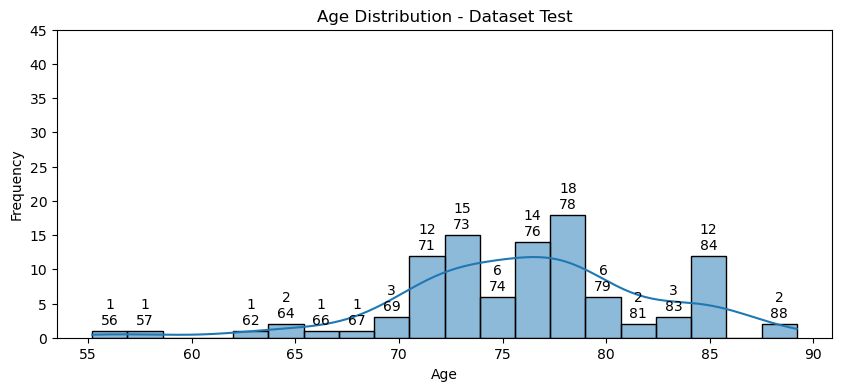

In [3]:
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=df_hippo, x='Age', bins=20, kde=True)
plt.title('Age Distribution - Dataset Train')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.ylim(0, 45)  # Set the y-axis limit to 45

# Add the specific number and the age on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only add text for bars with height greater than 0
        age = int(p.get_x() + p.get_width() / 2)
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}\n{age}', ha='center', va='bottom')

plt.show()

plt.figure(figsize=(10, 4))
ax = sns.histplot(data=df_test, x='Age', bins=20, kde=True)
plt.title('Age Distribution - Dataset Test')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.ylim(0, 45)  # Set the y-axis limit to 45

# Add the specific number and the age on each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only add text for bars with height greater than 0
        age = int(p.get_x() + p.get_width() / 2)
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}\n{age}', ha='center', va='bottom')

plt.show()

Sex

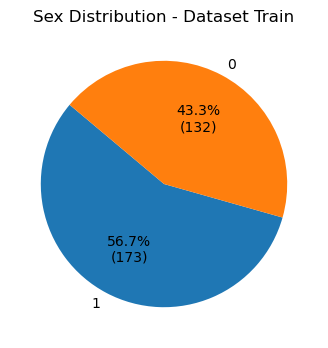

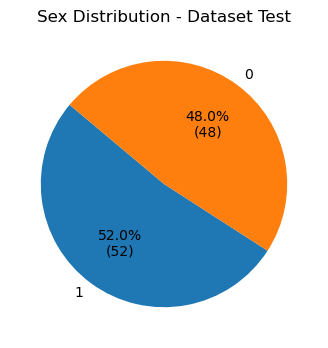

In [4]:
# Count the occurrences of each sex
sex_counts = df_hippo['Sex'].value_counts()

# Plot the pie chart for the training dataset
plt.figure(figsize=(4, 4))
plt.pie(sex_counts, labels=sex_counts.index, autopct=lambda p: f'{p:.1f}%\n({sex_counts[int(p // (100 / len(sex_counts)))]})', startangle=140)
plt.title('Sex Distribution - Dataset Train') 
plt.show()

# Count the occurrences of each sex in the test dataset
sex_counts_test = df_test['Sex'].value_counts()

# Plot the pie chart for the test dataset
plt.figure(figsize=(4, 4))
plt.pie(sex_counts_test, labels=sex_counts_test.index, autopct=lambda p: f'{p:.1f}%\n({sex_counts_test[int(p // (100 / len(sex_counts_test)))]})', startangle=140)
plt.title('Sex Distribution - Dataset Test') 
plt.show()

Transition

/tmp/ipykernel_17651/1125258879.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=transition_percentages.index, y=transition_percentages.values, palette='viridis')


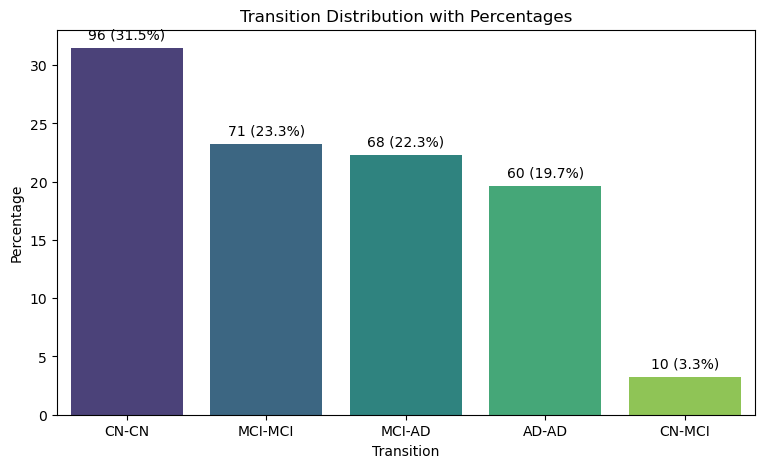

In [5]:
# Count the occurrences of each transition
transition_counts = df_hippo['Transition'].value_counts()

# Calculate the percentages
transition_percentages = (transition_counts / transition_counts.sum()) * 100

# Plot the bar chart
plt.figure(figsize=(9, 5))
ax = sns.barplot(x=transition_percentages.index, y=transition_percentages.values, palette='viridis')

# Add the number of occurrences and percentages on the bars
for i, (count, percentage) in enumerate(zip(transition_counts.values, transition_percentages.values)):
    ax.text(i, percentage + 0.5, f'{count} ({percentage:.1f}%)', ha='center', va='bottom')

plt.title('Transition Distribution with Percentages')
plt.xlabel('Transition')
plt.ylabel('Percentage')
plt.show()

Age/Transition distribution by Sex

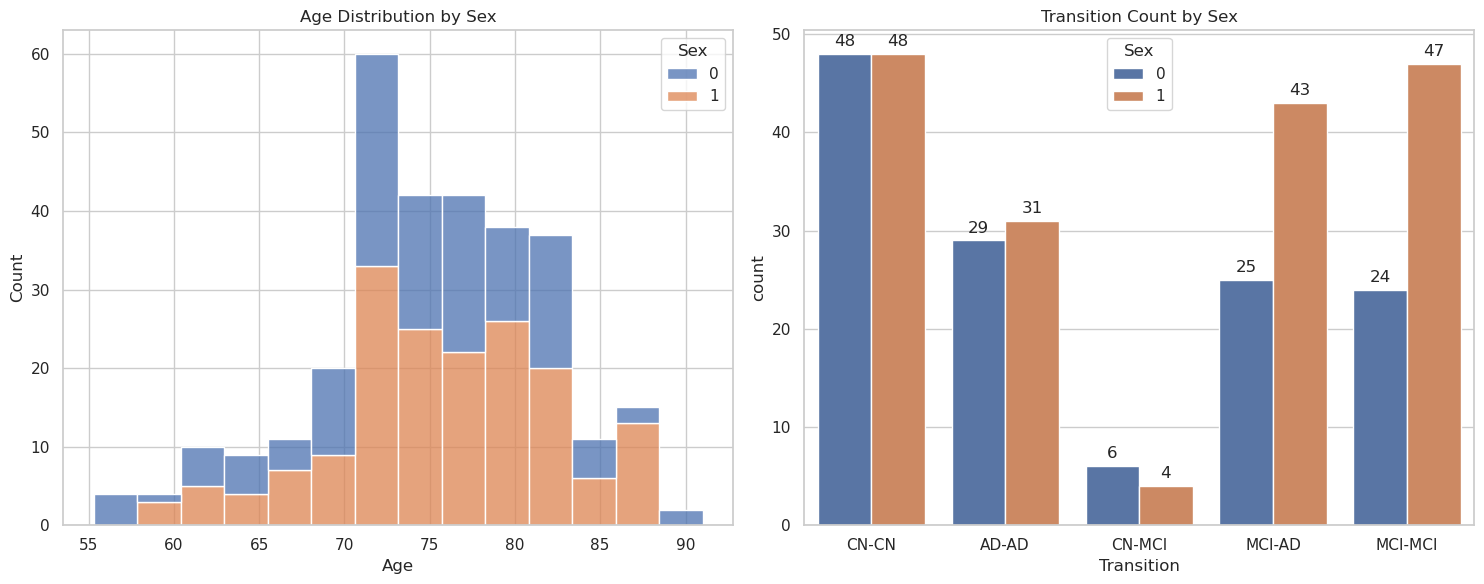

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot the distribution of age by sex
sns.histplot(data=df_hippo, x='Age', hue='Sex', multiple='stack', ax=ax[0])
ax[0].set_title('Age Distribution by Sex')

# Plot the count of transitions by sex
sns.countplot(data=df_hippo, x='Transition', hue='Sex', ax=ax[1])
ax[1].set_title('Transition Count by Sex')

# Add the count on each bar
for p in ax[1].patches:
    height = p.get_height()
    if height > 0:  # Only add text for bars with height greater than 0
        ax[1].text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Transition Count by Age

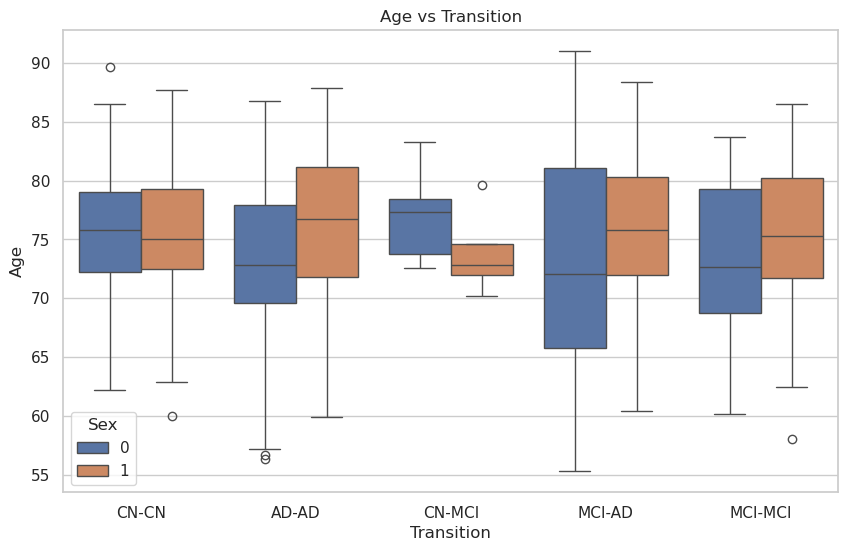

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_hippo, x='Transition', y='Age', hue='Sex', palette='deep')
plt.title('Age vs Transition')
plt.xlabel('Transition')
plt.ylabel('Age')
plt.legend(title='Sex')
plt.show()


Object Values

In [8]:
# Extract object columns
object_columns = df_hippo.select_dtypes(include=['object'])

# Write the values to a text file
with open('../info/object_columns_values.txt', 'w') as file:
    for column in object_columns:
        file.write(f"Column: {column}\n")
        file.write(object_columns[column].to_string(index=False))
        file.write("\n\n")